<a href="https://colab.research.google.com/github/samirasousza/RNA-2025.2-PP2.2/blob/main/PP2_2_2_Proposicao_e_Avaliacao_de_RNAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Redes Neurais Artificiais 2025.2

- **Disciplina**: Redes Neurais Artificiais 2025.2
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão. Para tanto, use o StandardScaler e inicialize-o com os dados do conjunto de treino (fit), ajudando-os em seguida (transform). Depois, ajuste os dados do conjunto de testes.

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.

Importando bibliotecas

In [ ]:
from joblib import Parallel, delayed
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install kagglehub

In [ ]:
# Importando o dataset
path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\nadap\.cache\kagglehub\datasets\uciml\forest-cover-type-dataset\versions\1


In [ ]:
# Abrindo o dataset

df = pd.read_csv(path + "/covtype.csv")
pd.set_option('display.max_columns', None)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
# Retirando os dados categoricos
df_ = pd.DataFrame(data=df, columns=("Elevation", "Aspect", "Slope",
                                     "Horizontal_Distance_To_Hydrology",
                                     "Vertical_Distance_To_Hydrology",
                                     "Horizontal_Distance_To_Roadways",
                                     "Hillshade_9am","Hillshade_Noon",
                                     "Hillshade_3pm",
                                     "Horizontal_Distance_To_Fire_Points",
                                     "Cover_Type"
                                     ))
df_.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5


In [ ]:
# Armazenando os atributos alvos
y = df_["Cover_Type"]

# Armazenando os atributos preditores
X = df_.drop("Cover_Type", axis=1)

In [ ]:
# Partição holdout 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=39)

In [ ]:
def standardScale(df, X_train, X_test):
    # Realizando o escalonamento dos dados com a padronizacao
    X_train_stand = X_train.copy()
    X_test_stand = X_test.copy()

    # numerical features
    num_cols = df_.columns[:-1]

    # apply standardization on numerical features
    for i in num_cols:

        # Usando somente o conjunto de treinamento de X
        scale = StandardScaler().fit(X_train_stand[[i]])

        # transform the training data column
        X_train_stand[i] = scale.transform(X_train_stand[[i]])

        # transform the testing data column
        X_test_stand[i] = scale.transform(X_test_stand[[i]])

    return X_train_stand, X_test_stand

### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 10 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 10 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(10), activation="relu", solver="adam", verbose=True, max_iter=300)
X_train_stand, X_test_stand = standardScale(df_, X_train, X_test)
model.fit(X_train_stand, y_train)

Iteration 1, loss = 0.93951067
Iteration 2, loss = 0.70539509
Iteration 3, loss = 0.68511313
Iteration 4, loss = 0.67865832
Iteration 5, loss = 0.67564729
Iteration 6, loss = 0.67391778
Iteration 7, loss = 0.67264601
Iteration 8, loss = 0.67183711
Iteration 9, loss = 0.67126442
Iteration 10, loss = 0.67089418
Iteration 11, loss = 0.67057896
Iteration 12, loss = 0.67020186
Iteration 13, loss = 0.66986703
Iteration 14, loss = 0.66948721
Iteration 15, loss = 0.66923209
Iteration 16, loss = 0.66892786
Iteration 17, loss = 0.66861904
Iteration 18, loss = 0.66783420
Iteration 19, loss = 0.66689306
Iteration 20, loss = 0.66615634
Iteration 21, loss = 0.66546964
Iteration 22, loss = 0.66476798
Iteration 23, loss = 0.66420690
Iteration 24, loss = 0.66353163
Iteration 25, loss = 0.66299125
Iteration 26, loss = 0.66232104
Iteration 27, loss = 0.66155627
Iteration 28, loss = 0.66082274
Iteration 29, loss = 0.66014996
Iteration 30, loss = 0.65967774
Iteration 31, loss = 0.65913537
Iteration 32, los

MLPClassifier(hidden_layer_sizes=10, max_iter=300, verbose=True)

Matriz de Confusão:


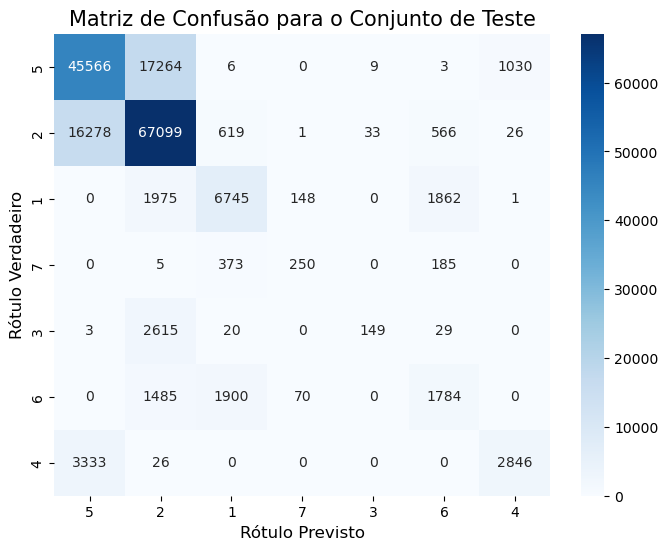

In [ ]:
y_pred = model.predict(X_test_stand)
cm = confusion_matrix(y_test, y_pred)

print("Matriz de Confusão:")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=df_["Cover_Type"].unique(),
            yticklabels=df_["Cover_Type"].unique())
plt.title('Matriz de Confusão para o Conjunto de Teste', fontsize=15)
plt.ylabel('Rótulo Verdadeiro', fontsize=12)
plt.xlabel('Rótulo Previsto', fontsize=12)
plt.show()

In [ ]:
acc_list_relu = []
f1_list_relu = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=i)
    model = MLPClassifier(hidden_layer_sizes=(10), activation="relu", solver="adam", verbose=False, max_iter=300)
    X_train_stand, X_test_stand = standardScale(df_, X_train, X_test)
    model.fit(X_train_stand, y_train)

    y_train_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred, average='macro')

    acc_list_relu.append(acc)
    f1_list_relu.append(f1)

print("Resultados (10 repetições - solver='adam')")
print(f"Acurácia - Média: {np.mean(acc_list_relu):.4f}, Desvio Padrão: {np.std(acc_list_relu):.4f}")
print(f"F1-Score - Média: {np.mean(f1_list_relu):.4f}, Desvio Padrão: {np.std(f1_list_relu):.4f}")

Resultados (10 repetições - solver='adam')
Acurácia - Média: 0.0906, Desvio Padrão: 0.0938
F1-Score - Média: 0.0292, Desvio Padrão: 0.0234


In [ ]:
report = classification_report(y_test, y_pred, target_names=[str(x) for x in df_["Cover_Type"].unique()])

print("Relatório de Classificação para o Conjunto de Treinamento:\n")
print(report)

Relatório de Classificação para o Conjunto de Treinamento:

              precision    recall  f1-score   support

           5       0.36      0.37      0.37     63514
           2       0.49      0.52      0.50     85020
           1       0.06      0.06      0.06     10741
           7       0.00      0.00      0.00       822
           3       0.01      0.00      0.00      2877
           6       0.03      0.03      0.03      5167
           4       0.03      0.02      0.03      6163

    accuracy                           0.39    174304
   macro avg       0.14      0.14      0.14    174304
weighted avg       0.38      0.39      0.38    174304



In [ ]:
acc_list_sgd = []
f1_list_sgd = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=i)
    model = MLPClassifier(hidden_layer_sizes=(10), activation="relu", solver="sgd", verbose=False, max_iter=300)
    X_train_stand, X_test_stand = standardScale(df_, X_train, X_test)
    model.fit(X_train_stand, y_train)

    y_train_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred, average='macro')

    acc_list_sgd.append(acc)
    f1_list_sgd.append(f1)

print("Resultados (10 repetições - solver='adam')")
print(f"Acurácia - Média: {np.mean(acc_list_sgd):.4f}, Desvio Padrão: {np.std(acc_list_sgd):.4f}")
print(f"F1-Score - Média: {np.mean(f1_list_sgd):.4f}, Desvio Padrão: {np.std(f1_list_sgd):.4f}")

Resultados (10 repetições - solver='adam')
Acurácia - Média: 0.0436, Desvio Padrão: 0.0129
F1-Score - Média: 0.0153, Desvio Padrão: 0.0086


### Com o solver SGD

In [ ]:
model_ = MLPClassifier(hidden_layer_sizes=(10), activation="relu", solver="sgd", verbose=True, max_iter=300)
model_.fit(X_train_stand, y_train)

Iteration 1, loss = 1.03705564
Iteration 2, loss = 0.81301280
Iteration 3, loss = 0.75980641
Iteration 4, loss = 0.73677854
Iteration 5, loss = 0.72425515
Iteration 6, loss = 0.71596669
Iteration 7, loss = 0.70986989
Iteration 8, loss = 0.70501160
Iteration 9, loss = 0.70093852
Iteration 10, loss = 0.69743258
Iteration 11, loss = 0.69432000
Iteration 12, loss = 0.69150470
Iteration 13, loss = 0.68888135
Iteration 14, loss = 0.68643804
Iteration 15, loss = 0.68428883
Iteration 16, loss = 0.68242930
Iteration 17, loss = 0.68071898
Iteration 18, loss = 0.67917650
Iteration 19, loss = 0.67780973
Iteration 20, loss = 0.67655655
Iteration 21, loss = 0.67546182
Iteration 22, loss = 0.67450344
Iteration 23, loss = 0.67364164
Iteration 24, loss = 0.67282906
Iteration 25, loss = 0.67208325
Iteration 26, loss = 0.67141692
Iteration 27, loss = 0.67082595
Iteration 28, loss = 0.67030201
Iteration 29, loss = 0.66979692
Iteration 30, loss = 0.66941017
Iteration 31, loss = 0.66900714
Iteration 32, los

MLPClassifier(hidden_layer_sizes=10, max_iter=300, solver='sgd', verbose=True)

Matriz de Confusão:


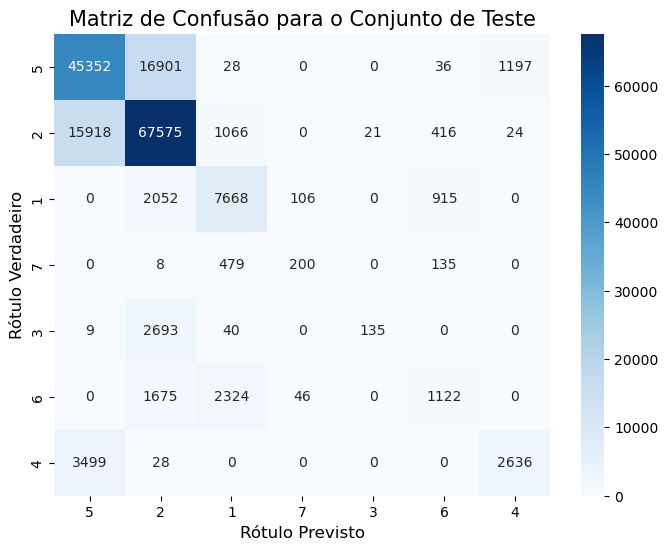

In [ ]:
y_pred = model_.predict(X_test_stand)
cm = confusion_matrix(y_test, y_pred)

print("Matriz de Confusão:")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=df_["Cover_Type"].unique(),
            yticklabels=df_["Cover_Type"].unique())
plt.title('Matriz de Confusão para o Conjunto de Teste', fontsize=15)
plt.ylabel('Rótulo Verdadeiro', fontsize=12)
plt.xlabel('Rótulo Previsto', fontsize=12)
plt.show()

In [ ]:
report = classification_report(y_test, y_pred, target_names=[str(x) for x in df_["Cover_Type"].unique()])

print("Relatório de Classificação para o Conjunto de Treinamento:\n")
print(report)

Relatório de Classificação para o Conjunto de Treinamento:

              precision    recall  f1-score   support

           5       0.70      0.71      0.71     63514
           2       0.74      0.79      0.77     85020
           1       0.66      0.71      0.69     10741
           7       0.57      0.24      0.34       822
           3       0.87      0.05      0.09      2877
           6       0.43      0.22      0.29      5167
           4       0.68      0.43      0.53      6163

    accuracy                           0.72    174304
   macro avg       0.66      0.45      0.49    174304
weighted avg       0.71      0.72      0.70    174304



## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 10 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros, repetindo cada treinamento/avaliação por 10 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [ ]:
architectures = [
    {'hidden_layer_sizes': (2,), 'activation': 'relu'},
    {'hidden_layer_sizes': (4,), 'activation': 'tanh'},
    {'hidden_layer_sizes': (8,), 'activation': 'relu'},
    {'hidden_layer_sizes': (4, 2), 'activation': 'relu'},
    {'hidden_layer_sizes': (8, 4), 'activation': 'tanh'},
    {'hidden_layer_sizes': (4, 2), 'activation': 'logistic'},
    {'hidden_layer_sizes': (4,), 'activation': 'tanh'},
    {'hidden_layer_sizes': (4, 4), 'activation': 'relu'},
    {'hidden_layer_sizes': (8,), 'activation': 'logistic'},
    {'hidden_layer_sizes': (8, 4), 'activation': 'relu'},
]

# Hiperparâmetros
solver ='adam'
epochs = [100, 150, 200]

# Resultados
results = []

for arch_idx, arch in enumerate(architectures):
      for epoch in epochs:
          for repeat in range(10):
            model = MLPClassifier(
            hidden_layer_sizes=arch['hidden_layer_sizes'],
            activation=arch['activation'],
            solver=solver,
            max_iter=epoch,
            random_state=repeat  # muda a semente
          )
              # Use the standardized training data
            model.fit(X_train_stand, y_train)
            # Use the standardized testing data for prediction
            y_pred = model.predict(X_test_stand)

            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted') # Specify weighted average
            cm = confusion_matrix(y_test, y_pred).ravel()
            print(arch)

            results.append({
                    'arch_id': f'A{arch_idx+1}',
                    'hidden_layer_sizes': arch['hidden_layer_sizes'],
                    'activation': arch['activation'],
                    'solver': solver,
                    'epochs': epoch,
                    'repeat': repeat,
                    'accuracy': acc,
                    'f1_score': f1,
                    'cm': cm,
                    'params': arch
                })

{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'activation': 'relu'}
{'hidden_layer_sizes': (2,), 'a

c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'a

c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (8,), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 2), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 2), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 2), 'activation': 'relu'}
{'hidden_layer_sizes': (4

c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}
{'hidden_layer_sizes': (8, 4), 'activation': 'tanh'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 'activation': 'logistic'}
{'hidden_layer_sizes': (4, 2), 

c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'activation': 'tanh'}
{'hidden_layer_sizes': (4,), 'a

c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (4, 4), 'activation': '

c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}
{'hidden_layer_sizes': (8, 4), 'activation': 'relu'}


In [ ]:
# Calculate TP, TN, FP, FN from the confusion matrix for each row
# For a multi-class confusion matrix of shape (n_classes, n_classes):
# TP for class i = cm[i, i]
# FP for class i = sum(cm[j, i] for j != i)
# FN for class i = sum(cm[i, j] for j != i)
# TN for class i = sum(cm) - TP[i] - FP[i] - FN[i]

def calculate_metrics_from_cm(cm_list):
    cm = np.array(cm_list).reshape(7, 7) # Reshape based on number of classes
    tp = np.diag(cm)
    fp = np.sum(cm, axis=0) - tp
    fn = np.sum(cm, axis=1) - tp
    total = np.sum(cm)
    tn = total - (tp + fp + fn)
    return tp.tolist(), tn.tolist(), fp.tolist(), fn.tolist()

In [ ]:
df_a = pd.DataFrame(results)

metrics = df_a['cm'].apply(lambda x: calculate_metrics_from_cm(x))
df_a[['tp', 'tn', 'fp', 'fn']] = pd.DataFrame(metrics.tolist(), index=df_a.index)

grouped_a = df_a.groupby((['hidden_layer_sizes', 'activation', 'solver','epochs']))[['accuracy','f1_score']].mean()
top3_a = grouped_a.sort_values(by=['f1_score','accuracy'], ascending=False).head(3)

for idx, _ in top3_a.iterrows():
    hls, act, solver, epochs = idx
    sub = df_a[(df_a['hidden_layer_sizes']==hls) &
             (df_a['activation']==act) &
             (df_a['solver']==solver) &
             (df_a['epochs']==epochs)]
    best_a = sub.sort_values(by='f1_score', ascending=False).iloc[0]
    print(f"\nArquitetura: {hls}, ativação: {act}, solver: {solver}, epochs: {epochs}")
    print(f"Melhor repetição: {int(best_a['repeat'])}")
    print(f"F1: {best_a['f1_score']:.4f}, Acurácia: {best_a['accuracy']:.4f}")
    print(f"TP: {best_a['tp']}, TN: {best_a['tn']}, FP: {best_a['fp']}, FN: {best_a['fn']}")


Arquitetura: (8, 4), ativação: tanh, solver: adam, epochs: 200
Melhor repetição: 0
F1: 0.7187, Acurácia: 0.7303
TP: [47166, 67225, 8413, 331, 0, 819, 3344], TN: [91942, 68318, 158698, 173216, 171427, 168080, 167137], FP: [18848, 20966, 4865, 266, 0, 1057, 1004], FN: [16348, 17795, 2328, 491, 2877, 4348, 2819]

Arquitetura: (8, 4), ativação: tanh, solver: adam, epochs: 150
Melhor repetição: 3
F1: 0.7165, Acurácia: 0.7248
TP: [45080, 68380, 7987, 376, 413, 1102, 2993], TN: [92883, 66138, 159292, 173181, 171243, 167778, 167336], FP: [17907, 23146, 4271, 301, 184, 1359, 805], FN: [18434, 16640, 2754, 446, 2464, 4065, 3170]

Arquitetura: (8, 4), ativação: tanh, solver: adam, epochs: 100
Melhor repetição: 3
F1: 0.7165, Acurácia: 0.7248
TP: [45080, 68380, 7987, 376, 413, 1102, 2993], TN: [92883, 66138, 159292, 173181, 171243, 167778, 167336], FP: [17907, 23146, 4271, 301, 184, 1359, 805], FN: [18434, 16640, 2754, 446, 2464, 4065, 3170]


Ao realizar teste individuais de modelos, verificou-se que o otimizador SGD não apresentava resultados significativamente melhores que o ADAM e seu tempo de execução era mais lento, por esse motivo somente o otimizador ADAM foi utilizado.

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída.

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np

# Hiperparâmetros
solver ='adam'
epochs = [100, 150, 200]
alphas = [0.5, 2, 3]
n_arr = [alpha * np.sqrt(X_train_stand.shape[1] * len(df_["Cover_Type"].unique())) for alpha in alphas ]
print(n_arr)
# Resultados
results_ = []
id = 0
for n in range(len(n_arr)):
  for epoch in epochs:
    for repeat in range(10):
      model = MLPClassifier(
      hidden_layer_sizes=round(n_arr[n]),
      solver=solver,
      max_iter=epoch,
      alpha=alphas[n]
        )
      # Use the standardized training data
      model.fit(X_train_stand, y_train)
      # Use the standardized testing data for prediction
      y_pred = model.predict(X_test_stand)

      acc = accuracy_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred, average='weighted') # Specify weighted average
      cm = confusion_matrix(y_test, y_pred).ravel()

      results_.append({
      'arch_id': f'N{id}',
      'solver': solver,
      'epochs': epoch,
      'repeat': repeat,
      'accuracy': acc,
      'f1_score': f1,
      'cm': cm,
      'alpha': alphas[n],
      'n': n_arr[n]
      })
      id += 1

[4.183300132670378, 16.73320053068151, 25.099800796022265]


c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\nadap\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
df_r = pd.DataFrame(results_)

# Apply the function to the 'cm' column and create new columns
metrics = df_r['cm'].apply(lambda x: calculate_metrics_from_cm(x))
df_r[['tp', 'tn', 'fp', 'fn']] = pd.DataFrame(metrics.tolist(), index=df_r.index)


# média por arquitetura (ocultando repeat) para escolher top‑3
grouped_pg = df_r.groupby(['n', 'alpha', 'solver','epochs'])[['accuracy','f1_score']].mean()
top3_pg = grouped_pg.sort_values(by=['f1_score','accuracy'], ascending=False).head(3)
print(top3_pg)

# para cada um desses top3: pegar a repetição com melhor f1_score e mostrar tp, tf, fp, fn
for idx, _ in top3_pg.iterrows():
    print(idx)
    n, alpha, solver, epochs = idx
    sub = df_r[(df_r['n']==n) &
             (df_r['alpha']==alpha) &
             (df_r['solver']==solver) &
             (df_r['epochs']==epochs)]
    best_pg = sub.sort_values(by='f1_score', ascending=False).iloc[0]
    print(f"\nArquitetura: {n}, ativação: {alpha}, solver: {solver}, epochs: {epochs}")
    print(f"Melhor repetição: {int(best_pg['repeat'])}")
    print(f"F1: {best_pg['f1_score']:.4f}, Acurácia: {best_pg['accuracy']:.4f}")
    # Print TP, TN, FP, FN for each class
    print("Metrics per class:")
    for i in range(len(best_pg['tp'])):
        print(f"  Class {i+1}: TP={best_pg['tp'][i]}, TN={best_pg['tn'][i]}, FP={best_pg['fp'][i]}, FN={best_pg['fn'][i]}")

                            accuracy  f1_score
n      alpha solver epochs                    
4.1833 0.5   adam   200     0.698271  0.680250
                    100     0.698728  0.679581
                    150     0.697660  0.678119
(4.183300132670378, 0.5, 'adam', 200)

Arquitetura: 4.183300132670378, ativação: 0.5, solver: adam, epochs: 200
Melhor repetição: 7
F1: 0.6849, Acurácia: 0.7018
Metrics per class:
  Class 1: TP=44575, TN=90747, FP=20043, FN=18939
  Class 2: TP=68247, TN=64142, FP=25142, FN=16773
  Class 3: TP=7152, TN=159137, FP=4426, FN=3589
  Class 4: TP=0, TN=173482, FP=0, FN=822
  Class 5: TP=0, TN=171427, FP=0, FN=2877
  Class 6: TP=585, TN=167972, FP=1165, FN=4582
  Class 7: TP=1774, TN=166946, FP=1195, FN=4389
(4.183300132670378, 0.5, 'adam', 100)

Arquitetura: 4.183300132670378, ativação: 0.5, solver: adam, epochs: 100
Melhor repetição: 5
F1: 0.6852, Acurácia: 0.7016
Metrics per class:
  Class 1: TP=45604, TN=89517, FP=21273, FN=17910
  Class 2: TP=66728, TN=65218

In [ ]:
best_per_epoch_a = grouped_a.loc[
    grouped_a.groupby(['epochs'])['f1_score'].idxmax()
].sort_values(by=['f1_score', 'accuracy'], ascending=False)
best_per_epoch_a

accuracy  f1_score
hidden_layer_sizes activation solver epochs                    
(8, 4)             tanh       adam   200     0.724161  0.712661
                                     150     0.723580  0.711973
                                     100     0.722942  0.711090

In [ ]:
best_per_n_pg = grouped_pg.loc[
    grouped_pg.groupby(['alpha'])['f1_score'].idxmax()
].sort_values(by=['f1_score', 'accuracy'], ascending=False)
best_per_n_pg

,,,,accuracy,f1_score
n,alpha,solver,epochs,,
4.183300,0.5,adam,200,0.698271,0.680250
16.733201,2.0,adam,200,0.697186,0.670347
25.099801,3.0,adam,100,0.693296,0.663918


## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante 10 repetições de cada (aferir flutuação estocástica)

### Selecionando dataset original

In [ ]:
# Usando dados originais do dataset

y = df_["Cover_Type"]
X = df_.drop("Cover_Type", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=39)
X_train_stand, X_test_stand = standardScale(df_, X_train, X_test)

#### Treinando as 3 melhores arquiteturas personalizadas

In [ ]:
def train_rnn_a(hidden_layer_sizes, activation, n_repeat, X_train_stand, y_train, epochs=200, solver="adam"):
    results=[]
    id=0
    for repeat in range(n_repeat):
        model = MLPClassifier(
          hidden_layer_sizes=hidden_layer_sizes,
          activation=activation,
          solver=solver,
          max_iter=epochs,
        )
            # Use the standardized training data
        model.fit(X_train_stand, y_train)
        # Use the standardized testing data for prediction
        y_pred = model.predict(X_test_stand)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted') # Specify weighted average
        cm = confusion_matrix(y_test, y_pred).ravel()
        print(arch)

        results.append({
                'arch_id': f'A{id+1}',
                'hidden_layer_sizes': hidden_layer_sizes,
                'activation': activation,
                'solver': solver,
                'epochs': epochs,
                'repeat': repeat,
                'accuracy': acc,
                'f1_score': f1,
                'cm': cm,
                'params': arch
            })
        id+=1
    return results

In [ ]:
tasks_a = []
for index, row in best_per_epoch_a.iterrows():
    print(row)
    tasks_a.append((row.name[0], row.name[1], 200, X_train_stand, y_train, 200, row.name[2]))

from joblib import parallel_backend
with parallel_backend('loky', n_jobs=-1):
    results_a = Parallel()(delayed(train_rnn_a)(*task) for task in tasks_a)


accuracy    0.724161
f1_score    0.712661
Name: ((8, 4), tanh, adam, 200), dtype: float64
accuracy    0.723580
f1_score    0.711973
Name: ((8, 4), tanh, adam, 150), dtype: float64
accuracy    0.722942
f1_score    0.711090
Name: ((8, 4), tanh, adam, 100), dtype: float64


In [ ]:
results_a_df_all = []
for net in range(len(results_a)):
    results_a_df = pd.DataFrame(results_a[net])
    print(f"Modelo:\nN° neurônios: {results_a_df["hidden_layer_sizes"][0]}\nAtivação: {results_a_df["activation"][0]}\nOtimizador: {results_a_df["solver"][0]}\nÉpocas: {results_a_df["epochs"][0]}")
    print(f"Média F1 Score: {np.mean(results_a_df['f1_score'])} Desvio Padrão: {np.std(results_a_df['f1_score'])}")
    print(f"Média Acurácia {np.mean(results_a_df['accuracy'])} Desvio Padrão: {np.std(results_a_df['accuracy'])}")
    print("\n")
    results_a_df_all.append(results_a_df)



Modelo:
N° neurônios: (8, 4)
Ativação: tanh
Otimizador: adam
Épocas: 200
Média F1 Score: 0.7100448664710793 Desvio Padrão: 0.0035683605368548644
Média Acurácia 0.7218814829263817 Desvio Padrão: 0.0029920813902264754


Modelo:
N° neurônios: (8, 4)
Ativação: tanh
Otimizador: adam
Épocas: 200
Média F1 Score: 0.7091347071688996 Desvio Padrão: 0.003612213030229997
Média Acurácia 0.7210320761428309 Desvio Padrão: 0.00339917956176925


Modelo:
N° neurônios: (8, 4)
Ativação: tanh
Otimizador: adam
Épocas: 200
Média F1 Score: 0.7097057849850114 Desvio Padrão: 0.0036982695209414585
Média Acurácia 0.7217335230402057 Desvio Padrão: 0.0033378485839316648




#### Treinando as 3 melhores arquiteturas com base na pirâmide geométrica

In [ ]:
def train_rnn_pg(alpha, epochs, n, n_repeat, X_train_stand, y_train, solver="adam"):
    results=[]
    id=0
    for repeat in range(n_repeat):
        model = MLPClassifier(
        hidden_layer_sizes=round(n),
        solver=solver,
        max_iter=epoch,
        alpha=alpha
        )
        model.fit(X_train_stand, y_train)
        y_pred = model.predict(X_test_stand)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted') # Specify weighted average
        cm = confusion_matrix(y_test, y_pred).ravel()

        results.append({
        'arch_id': f'N{id}',
        'solver': solver,
        'epochs': epochs,
        'accuracy': acc,
        'f1_score': f1,
        'cm': cm,
        'alpha': alpha,
        'n': n
        })
        id += 1
    return results

In [ ]:
tasks_pg = []
for index, row in best_per_n_pg.iterrows():
    print(row)
    tasks_pg.append((row.name[1], 200, row.name[0], 100, X_train_stand, y_train))

from joblib import parallel_backend
with parallel_backend('loky', n_jobs=-1):
    results_pg = Parallel()(delayed(train_rnn_pg)(*task) for task in tasks_pg)


accuracy    0.698271
f1_score    0.680250
Name: (4.183300132670378, 0.5, adam, 200), dtype: float64
accuracy    0.697186
f1_score    0.670347
Name: (16.73320053068151, 2.0, adam, 200), dtype: float64
accuracy    0.693296
f1_score    0.663918
Name: (25.099800796022265, 3.0, adam, 100), dtype: float64


In [ ]:
results_pg_df_all = []
for net in range(len(results_pg)):
    results_pg_df = pd.DataFrame(results_pg[net])
    print(f"Modelo:\nN° neurônios: {results_pg_df["n"][0]}\nAlpha: {results_pg_df["alpha"][0]}\nÉpocas: {results_pg_df["epochs"][0]}\nOtimizador: {results_pg_df["solver"][0]}")
    print(f"Média F1 Score: {np.mean(results_pg_df['f1_score'])} Desvio Padrão: {np.std(results_pg_df['f1_score'])}")
    print(f"Média Acurácia {np.mean(results_pg_df['accuracy'])} Desvio Padrão: {np.std(results_pg_df['accuracy'])}")
    print("\n")
    results_pg_df_all.append(results_pg_df)


Modelo:
N° neurônios: 4.183300132670378
Alpha: 0.5
Épocas: 200
Otimizador: adam
Média F1 Score: 0.6786618336714207 Desvio Padrão: 0.003336092469420455
Média Acurácia 0.6977772741876261 Desvio Padrão: 0.0022395111527850316


Modelo:
N° neurônios: 16.73320053068151
Alpha: 2.0
Épocas: 200
Otimizador: adam
Média F1 Score: 0.6691780012300373 Desvio Padrão: 0.0011725895555652476
Média Acurácia 0.6963255002753809 Desvio Padrão: 0.0008214633531453701


Modelo:
N° neurônios: 25.099800796022265
Alpha: 3.0
Épocas: 200
Otimizador: adam
Média F1 Score: 0.662939370050802 Desvio Padrão: 0.000950333352332833
Média Acurácia 0.6925801473288047 Desvio Padrão: 0.0007416321306046606




Modelo:
N° neurônios: (8, 4)
Épocas: 200
Otimizador: tanh
Média F1 Score: 0.71065691373809 Desvio Padrão: 0.0027765550352698456
Média Acurácia 0.7224791169451075 Desvio Padrão: 0.001681908823930585




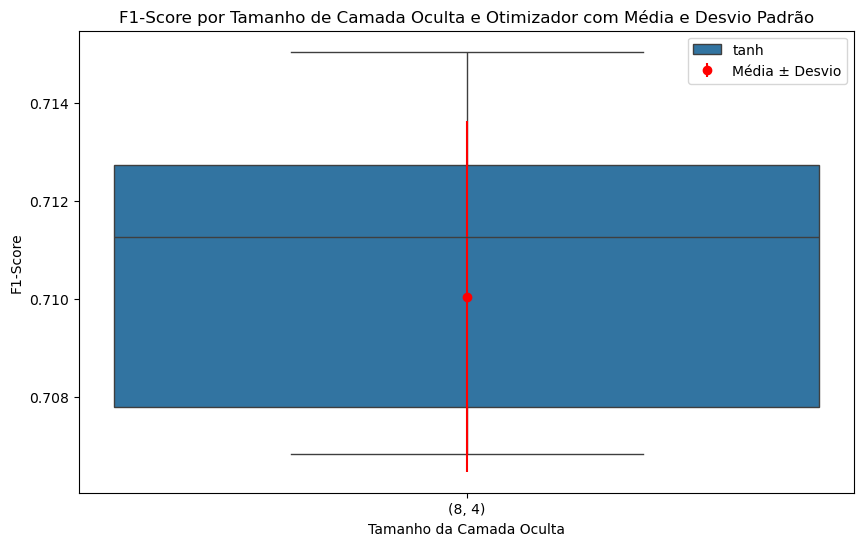

Modelo:
N° neurônios: (8, 4)
Épocas: 200
Otimizador: tanh
Média F1 Score: 0.7074576104578987 Desvio Padrão: 0.00307718746814427
Média Acurácia 0.7194304204149071 Desvio Padrão: 0.003344083663547479




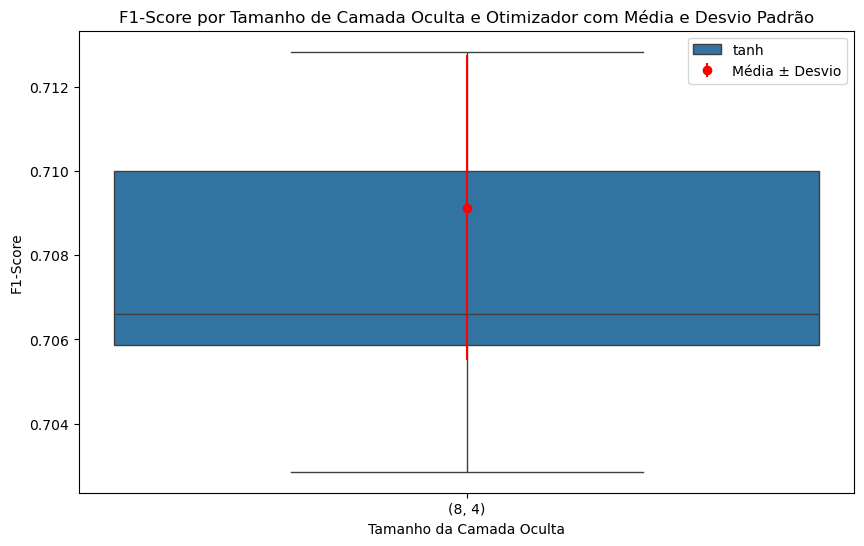

Modelo:
N° neurônios: (8, 4)
Épocas: 200
Otimizador: tanh
Média F1 Score: 0.7099674842882614 Desvio Padrão: 0.0034420884474925576
Média Acurácia 0.7220161327336149 Desvio Padrão: 0.003083103401507141




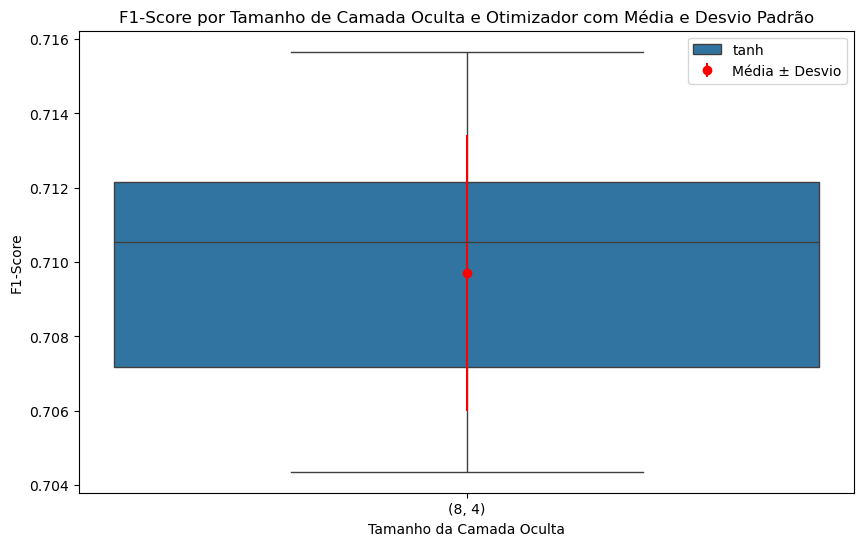

In [ ]:
for df in results_a_df_all:
    df_sample = df.sample(10)
    print(f"Modelo:\nN° neurônios: {df_sample["hidden_layer_sizes"].iloc[0]}\nÉpocas: {df_sample["epochs"].iloc[0]}\nOtimizador: {df_sample["activation"].iloc[0]}")
    print(f"Média F1 Score: {np.mean(df_sample['f1_score'])} Desvio Padrão: {np.std(df_sample['f1_score'])}")
    print(f"Média Acurácia {np.mean(df_sample['accuracy'])} Desvio Padrão: {np.std(df_sample['accuracy'])}")
    print("\n")
    plt.figure(figsize=(10, 6))

    # Boxplot com média e desvio padrão
    #sns.boxplot(data=df_sample, y='f1_score', hue='activation')
    mean_f1 = df.groupby(['epochs', 'solver', 'hidden_layer_sizes', 'activation'])['f1_score'].mean().reset_index(name='mean_f1_score')
    std_f1 = df.groupby(['epochs', 'solver', 'hidden_layer_sizes', 'activation'])['f1_score'].std().reset_index(name='std_f1_score')

    df_summary = pd.merge(mean_f1, std_f1, on=['epochs', 'solver', 'hidden_layer_sizes', 'activation'])
    sns.boxplot(data=df_sample, x=[str(n) for n in df_sample['hidden_layer_sizes']], y='f1_score', hue='activation')

    for i, row in df_summary.iterrows():
        plt.errorbar(x=row.name, y=row['mean_f1_score'], yerr=row['std_f1_score'], fmt='o', color='red', label='Média ± Desvio')


    plt.title('F1-Score por Tamanho de Camada Oculta e Otimizador com Média e Desvio Padrão')
    plt.xlabel('Tamanho da Camada Oculta')
    plt.ylabel('F1-Score')
    plt.legend()
    plt.show()

Modelo:
N° neurônios: 4.183300132670378
Alpha: 0.5
Épocas: 200
Otimizador: adam
Média F1 Score: 0.6780181957105597 Desvio Padrão: 0.0031860400147089123
Média Acurácia 0.6972416008812191 Desvio Padrão: 0.00220411552687118




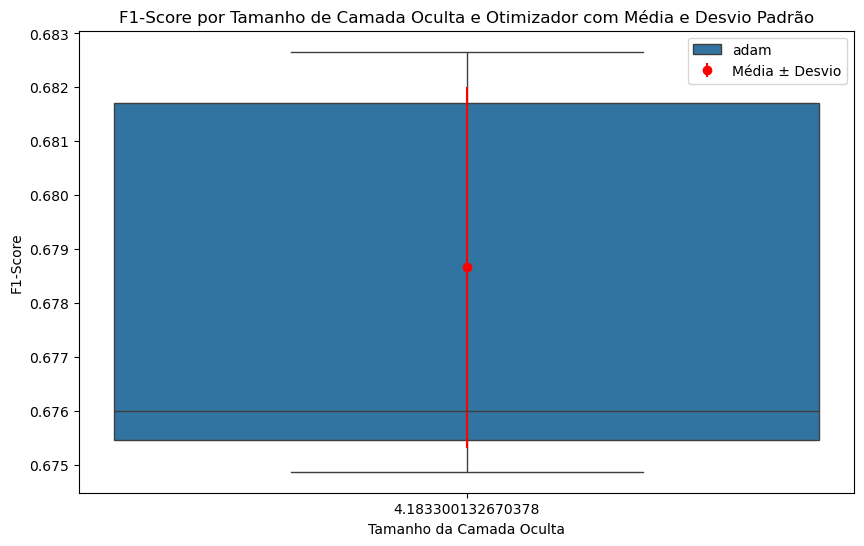

Modelo:
N° neurônios: 16.73320053068151
Alpha: 2.0
Épocas: 200
Otimizador: adam
Média F1 Score: 0.6692312732023985 Desvio Padrão: 0.0013365203388775431
Média Acurácia 0.696237034147237 Desvio Padrão: 0.000713435688924708




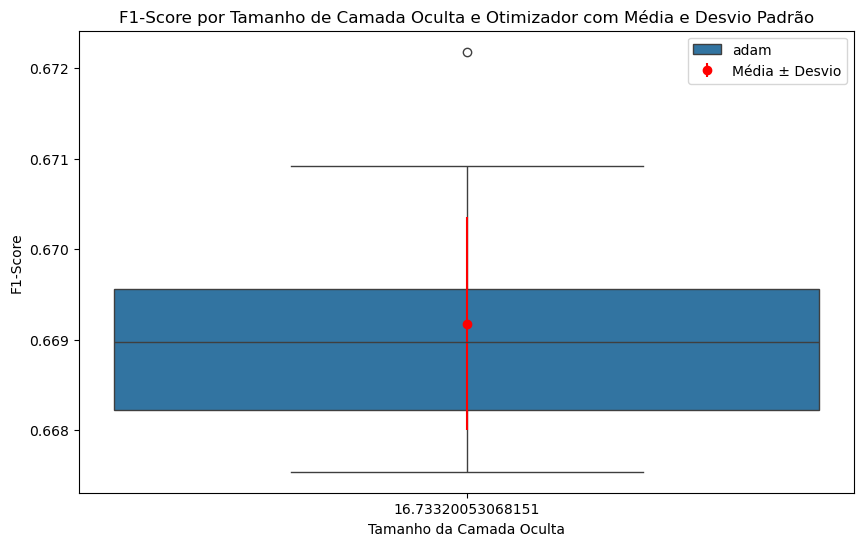

Modelo:
N° neurônios: 25.099800796022265
Alpha: 3.0
Épocas: 200
Otimizador: adam
Média F1 Score: 0.6632429838557323 Desvio Padrão: 0.0009761514761248365
Média Acurácia 0.6924861162107582 Desvio Padrão: 0.0006755201855144354




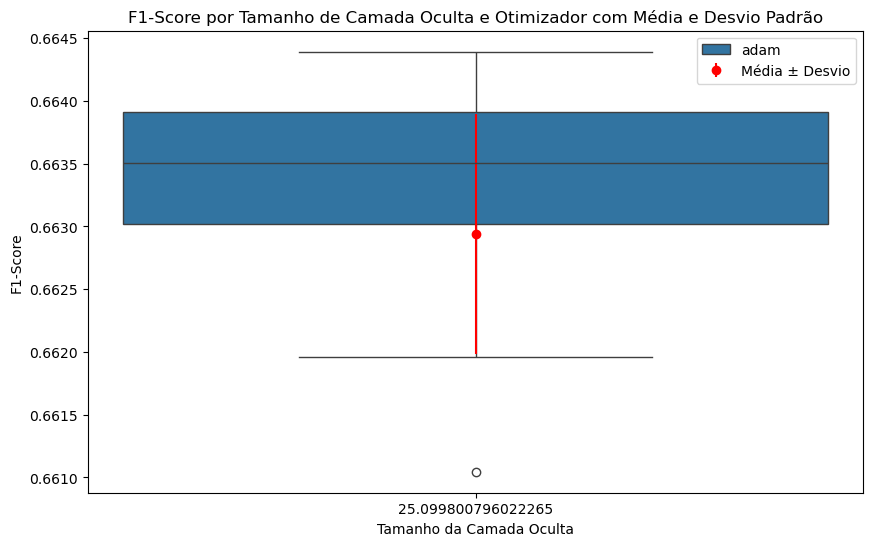

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
for df in results_pg_df_all:
    df_sample = df.sample(10)
    print(f"Modelo:\nN° neurônios: {df_sample["n"].iloc[0]}\nAlpha: {df_sample["alpha"].iloc[0]}\nÉpocas: {df_sample["epochs"].iloc[0]}\nOtimizador: {df_sample["solver"].iloc[0]}")
    print(f"Média F1 Score: {np.mean(df_sample['f1_score'])} Desvio Padrão: {np.std(df_sample['f1_score'])}")
    print(f"Média Acurácia {np.mean(df_sample['accuracy'])} Desvio Padrão: {np.std(df_sample['accuracy'])}")
    print("\n")
    plt.figure(figsize=(10, 6))

    # Boxplot com média e desvio padrão
    sns.boxplot(data=df_sample, x='n', y='f1_score', hue='solver')
    mean_f1 = df.groupby(['n', 'solver'])['f1_score'].mean().reset_index(name='mean_f1_score')
    std_f1 = df.groupby(['n', 'solver'])['f1_score'].std().reset_index(name='std_f1_score')

    df_summary = pd.merge(mean_f1, std_f1, on=['n', 'solver'])

    # Adicionando as médias com desvios padrão
    for i, row in df_summary.iterrows():
        plt.errorbar(x=row.name, y=row['mean_f1_score'], yerr=row['std_f1_score'], fmt='o', color='red', label='Média ± Desvio')

    plt.title('F1-Score por Tamanho de Camada Oculta e Otimizador com Média e Desvio Padrão')
    plt.xlabel('Tamanho da Camada Oculta')
    plt.ylabel('F1-Score')
    plt.legend()
    plt.show()

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?

As redes mostraram um desempenho simalar, porém as redes com arquitetura customizadas, mais especificamente as com 8 e 4 camadas ocultas, produziram um resultado levemente superior às que possuem o tamanho indicado pela regra da pirâmide geométrica. Quanto as categorias do dataset original usada nos treinamentos dos últimos modelos, não houve melhora significativa nas métricas f1 score e acurácia em relação aos modelos anteriores. Visto que em todas as melhores arquiteturas selecionadas, aquela que obteve o melhor desempenho, mesmo que pequeno, foi a que possuia o maior número de épocas entre as demais, logo o número de épocas configurada afetou parcialmente seus resultados.
A maior dificuldade enfrentada durante a resolução do problema foi o custo computacional que ele precisa para ser resolvido, dado que para se obter o melhor resultado apresentado foi preciso muitas experimentações e alterações durante o treino dos modelos, o que demandou muito tempo. Mesmo buscando o uso de estratégias de paralelização para agilizar a execução dos treinamentos, o problema exigiu reajustes e treinos demorados de novos modelos com especificações diferentes, que apesar de algumas estarem detalhadas nos enunciados, são características que ao se montar uma RNN são imprevisíveis de garantir um bom resultado antes de realizar sua avaliação.